The original small example form Longstaff and Schwartz (2001) is uselful to get a feel of how the algorithm works.
Few paths and few time-steps allows to easily track how the variables evolves.
However, in more realistic cases, there will be more time steps. Those time-steps won't have a length of exactly 1 year. There will be more paths. There could be more state variables. Any much more.

Here, we will extend to a few more paths, and a few more time-steps. This will be more useful later when we implement all the extensions to the LSMC method.

In [3]:
# Set the initial variables for the script
import numpy as np

# Define the initial parameters
r = 0.06 # Interest rate

dt = 1/12 # length of time step in years
nt = 12 # number of time steps to maturity of the option

N = 20 # Number of paths to simulate

# Here, we will simulate the stock price using a geometric Brownian motion model
S0 = 1  # Initial stock price
sigma = 0.2  # Volatility of the stock
np.random.seed(42)  # For reproducibility

# Geometric Brownian motion can be simulated withouth using a loop. 
# However, for clarity and for easier comparison with other dynamics, we will use a loop.
# Simulate the stock price path
S = np.zeros((N, nt + 1))
S[:, 0] = S0
for i in range(N):
    for t in range(1, nt + 1):
        Z = np.random.normal(0, 1)
        S[i, t] = S[i, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)


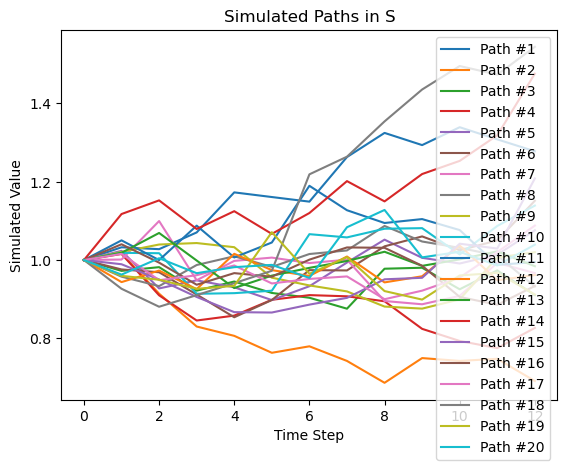

In [6]:
import matplotlib.pyplot as plt

# Assuming S is your simulated paths matrix: shape (num_paths, num_timesteps)
num_paths = S.shape[0]

for i in range(num_paths):
    plt.plot(S[i, :], label=f'Path #{i+1}')

plt.xlabel('Time Step')
plt.ylabel('Simulated Value')
plt.legend()
plt.title('Simulated Paths in S')
plt.show()